<a href="https://colab.research.google.com/github/subramanya4shenoy/MachineLearningNbs/blob/main/Kaggle/Competitions/PGS_S3E16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦀 Regression with a Crab Age Dataset 🦀
Playground Series - Season 3, Episode 16

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Crab Age Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

## 🔶 Look at the big Picture

### 🔸 **Frame the problem**
*   🟢 **Goal:** Our objective is to predict the probability of Age of Crab 🦀 🗒
*   🟢 **End Result:** `int` or `float` 🗒
*   🟢 **Problem Type:** Regression
*   🟢 **Learning Type:** Supervised Learning
*   🟢 **Variate:** Univariate (need to predict only 1 target)
*   🟢 **Features:** Multiple features

### 🔸 **Select performance measure**:
🟢 using Mean Absolute Error (MAE) 🗒 . This was given in the problem set. This also means there might be chances of high outliers.


### 🔸 **Assumptions**: `none`

---

## 🔶**Get the Data**

* 🟢 Get the kagle.json file into local
* 🟢 Download the data set from the kaggle (as zip)
* 🟢 Extract the zip into local and delete the Zip

* 🟢 Read the train set and test set store it in Pandas dataFrame

#### 🔸 **Take Quick look**
* 🟢 .head() to see the index columns and quick look at the data
* 🟢 .shape to see the size of training set
* 🟢 .info() to see the data types and missing values
* 🟢 .value_counts() on categorical data to check if all the categories are equaly represented and to check the weightages.
* 🟢 .describe() to check mean and std deviation, min, max this gives a hint of how data is distributed and what is the max values, min values and is there any scaled data or not.

#### 🔸 **Visualize the data**
* 🟢 .hist() to see the distribution of data and if any outliers, tail heavy etc.

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰

#### 🔸 **Observation**

* 👁  has extra index column, which can be removed
* 👁  has limited columns (10)


* 👁  has 74K data. My train & test split will be 8:2


* 👁  has 10 columns with 9 numeric value and 1 categorical column. Not seeing any missing data in any columns


* 👁  checking the unique value counts in categorical column (sex)
* 👁  We see the strats are well representative for now.


* 👁  Age is in integer (max is 29 and min being 1, need to check the scale of this)
* 👁  length, height and diameter numeric values are in range of 0 - 2
* 👁  we have 3 weights which looks related. (vw + sw = w)


* 👁  nothing unsusual or outliers as such from histograph

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰

In [195]:
"""
Basic setup for integrating Kaggle
Make sure the kaggle.json file is available and uploaded in session
"""
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [196]:
"""
Common method to get the data from kaggle
"""
def get_data_from_kaggle():
  !kaggle competitions download -c playground-series-s3e16 #Path to the dataset from kaggle
  !unzip \*.zip && rm *.zip #unzipping the files and removing the zip

In [197]:
get_data_from_kaggle()

100% 2.65M/2.65M [00:00<00:00, 4.00MB/s]
100% 2.65M/2.65M [00:00<00:00, 3.37MB/s]
Archive:  playground-series-s3e16.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [238]:
import pandas as pd

train_df = pd.read_csv('train.csv', index_col='id') #Index_col added post observation
test_df = pd.read_csv('test.csv', index_col='id') #Index_col added post observation

In [239]:
'''
Observation:
1. has extra Id column, which can be removed
2. has limited columns
'''
train_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [240]:
'''
Observation:
1. has 74K data
2. my split will be 8:2
'''
train_df.shape

(74051, 9)

In [241]:
'''
Observation:
1. 10 columns with 9 numeric value and 1 categorical column
2. Not seeing any missing data.
'''
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [242]:
'''
Observation:
1. checking the uniq value counts in categorical column (sex)
2. We see the strats are well representative for now.
'''
train_df['Sex'].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

In [243]:
'''
Observation:
1. Age is in integer (max is 29 and min being 1, need to check the scale of this)
2. length, height and diameter numeric values are in range of 0 - 2
3. we have 3 weights which looks related. (vw + sw = w)
'''
train_df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


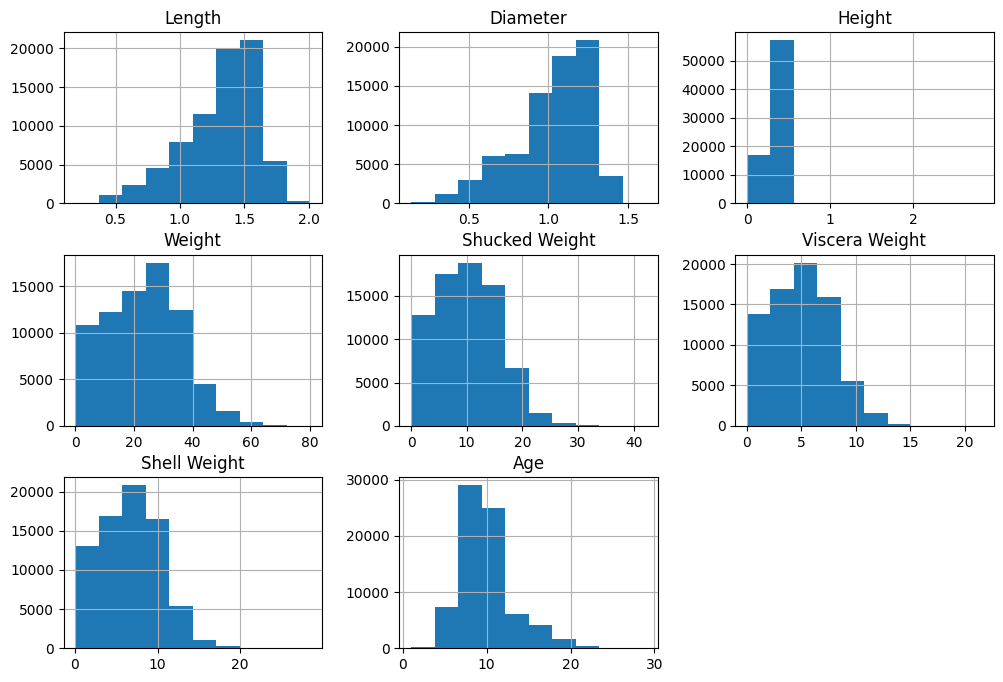

In [244]:
import matplotlib.pyplot as plt
'''
Observation:
1. nothing unsusual or outliers as such from hist
'''
train_df.hist(figsize=(12,8))
plt.show()

#### 🔸 **Create Training and test set**

* 🟢 We are going to split our test and train set in to 8:2 ratio

#### 🔸 **Visualize data and gain insights**
* 🟢 From the train_set lets get more insights and check if all the columns are represeented properly or not

> "Size Attributes (Length, Diameter, Height): As crabs grow, their size generally increases. Researchers might observe size changes over time to estimate relative age. However, the relationship between size and age can vary between crab species and environmental conditions.

>  Weight Attributes (Weight, Shucked Weight, Viscera Weight, Shell Weight): Similar to size, weight can be correlated with age. As crabs age and grow, they tend to gain weight. However, other factors like molting, reproduction, and environmental conditions can affect weight.

>  Sex: The sex of a crab can provide insights into its stage of maturity. Female crabs might show changes in reproductive structures as they age, indicating their readiness to reproduce."

#### 🔸 **Visualize data and gain insights**
* 🟢 Checking corelation

#### 🔸 **Experimenting with column combination**
* 🟢 grouping all weights and heights and trying to reduce the columns

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰

#### 🔸 **Observation**

* 👁  The length, height, Diameter are linear to Age. Mostly we can combine or eliminate few weights.
* 👁  The 'Viscera Weight', 'Shell Weight', 'Shucked Weight', 'Weight' linear to age. Mostly we can combine or eliminate few weights.
* 👁  Has equal Co-relation with all columns
* 👁  Co-relation between Weights are close to 1 so we are combining all the weights together to represent single weights.
* 👁 Assuming all crabs look like cylinders using volume as new column which uses: `Volume = π * (Diameter/2)^2 * Height`
* 👁 Removing rest of the columns after combining other columns

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰


In [245]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train_df, test_size=0.2, random_state=42)

print(train_set.shape)
print(test_set.shape)

test_set.head()

(59240, 9)
(14811, 9)


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
27233,I,1.6125,1.350,0.4375,35.692020,14.670866,6.435337,11.056305,18
55493,I,0.6625,0.500,0.1625,2.764076,1.133980,0.581165,0.793786,6
49980,M,1.3500,1.050,0.3000,21.871639,9.071840,5.684075,6.236890,8
28319,I,1.1125,0.800,0.2750,10.418441,4.266600,1.615922,3.401940,8
20212,I,1.0375,0.825,0.2500,6.506210,3.061746,1.686795,2.409708,8


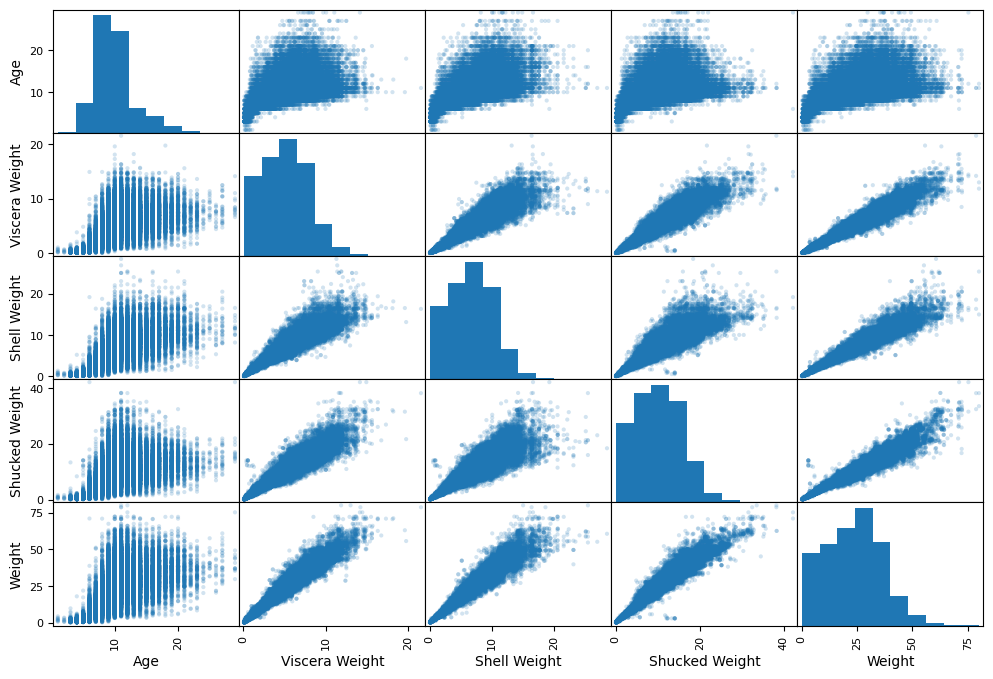

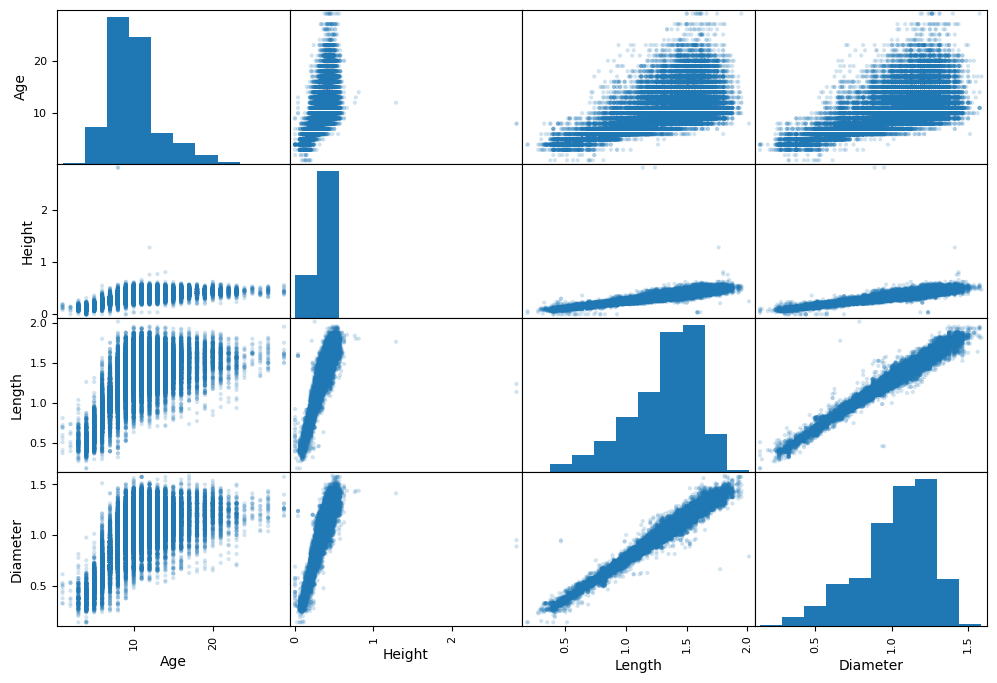

In [246]:
from pandas.plotting import scatter_matrix

weight_atributes = ['Age', 'Viscera Weight', 'Shell Weight', 'Shucked Weight', 'Weight']
height_atributes = ['Age', 'Height', 'Length', 'Diameter']

scatter_matrix(train_set[weight_atributes], figsize=(12,8), alpha=0.2)
scatter_matrix(train_set[height_atributes], figsize=(12,8), alpha=0.2)
plt.show()

In [247]:
corr_matrix = train_set.corr()
print(corr_matrix['Age'])

Length            0.612658
Diameter          0.620976
Height            0.635961
Weight            0.601559
Shucked Weight    0.503712
Viscera Weight    0.576761
Shell Weight      0.663209
Age               1.000000
Name: Age, dtype: float64


<ipython-input-247-963ab8475203>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_set.corr()


<ipython-input-248-eac655796cbd>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = combined_df.corr()


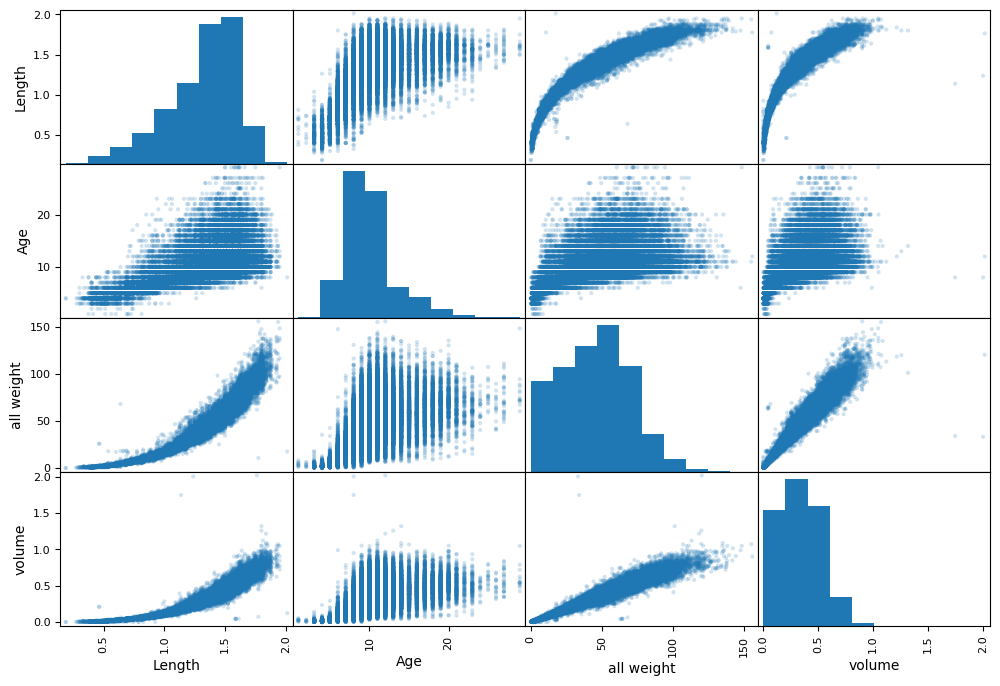

Length        0.612658
Age           1.000000
all weight    0.593287
volume        0.607816
Name: Age, dtype: float64

In [248]:
# Expermentations
import numpy as np

combined_df = train_set.copy()
combined_df['all weight'] = combined_df['Weight'] + combined_df['Shucked Weight'] + combined_df['Viscera Weight'] + combined_df['Shell Weight']
combined_df['volume'] = np.pi * ((combined_df['Diameter']/2) ** 2) * combined_df['Height']
column_drop = ['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Diameter', 'Height']
combined_df = combined_df.drop(columns=column_drop, axis=1)
corr_matrix = combined_df.corr()
scatter_matrix(combined_df, figsize=(12,8), alpha=0.2)
plt.show()
corr_matrix['Age']

## 🔶 Prepare the Data for ML

### 🔸 **Preliminary Steps**
*   🟢 Creating common Functions for operations
*   🟢 Make a copy of training set and seperate category and label





In [249]:
train = train_set.drop('Age', axis=1)
train_labels = train_set['Age']


*   🟢 Data Cleaning: Handling missing data (as there none) skipping. Handling Categoriacal data with OneHotEncoder

In [250]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)

train_cat = train[['Sex']]
housing_cat_1hot = cat_encoder.fit_transform(train_cat)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



*   🟢 feature scaling: all data are in range so scaling is better

### 🔸 **Setting up Pipeline**

In [251]:
import sklearn
sklearn.set_config(display="diagram")

In [252]:
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

# Custom Transformer to combine columns
class CombineFaturesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, y=None):
        return self

    def transform(self, X):
        X['all weight'] = (X['Weight'] + X['Shucked Weight'] + X['Viscera Weight'] + X['Shell Weight'])
        X['volume'] = (np.pi * ((X['Diameter'] / 2) ** 2) * X['Height'])
        column_drop = ['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Diameter', 'Height']
        X = X.drop(columns=column_drop, axis=1)
        self.columns = X.columns
        return X

    def get_feature_names_out(self):
        return self.columns



# Custom transformer to prtform onehot encoding
class EncodeColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
      pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        cat_encoder = OneHotEncoder(drop='first', handle_unknown="ignore")
        X_1hot = cat_encoder.fit_transform(X)
        self.columns = cat_encoder.get_feature_names_out()
        return X_1hot

    def get_feature_names_out(self):
        return self.columns



feature_combine_tf = CombineFaturesTransformer()
encode_column_tf = EncodeColumnTransformer()


# Create a ColumnTransformer with
# Combining feature and
# OneHotEncoder and drop the original column
preprocessor = ColumnTransformer(
    transformers=[
        ('combine features', feature_combine_tf, train_set.columns),
        ('encode column', encode_column_tf, ['Sex'])
        ],
    remainder='passthrough'
)


In [253]:
from sklearn.pipeline import Pipeline


def prepare_data(df):
  # Create a pipeline for preprocessing
  pipeline = Pipeline([('preprocessor', preprocessor)])

  # Fit and transform the DataFrame using the pipeline
  df_encoded = pipeline.fit_transform(df)

  # Convert the result to a DataFrame with appropriate column names
  column_names = list(preprocessor.transformers_[0][1].get_feature_names_out()) + list(preprocessor.transformers_[1][1].get_feature_names_out())
  prepared_df = pd.DataFrame(df_encoded, columns=column_names)
  prepared_df.drop("Sex", axis=1, inplace=True)
  return prepared_df

## 🔶 Select and Train Model

### 🔸 **Selecting Model**
*   🟢 As regression Model we are trying all the available prediction models.
*   🟢 We will try:
      - Linear Regression,
      - Decision Tree,
      - Random Forest
*   🟢 We will also calculate the MAE for  all of them


In [254]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression

model =  LinearRegression()

training_set_prepared = prepare_data(train_set)
lin_reg = model.fit(training_set_prepared, train_labels)


In [255]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

model =  DecisionTreeRegressor(random_state=42)
training_set_prepared = prepare_data(train_set)
dt_reg = model.fit(training_set_prepared, train_labels)

In [256]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
rf_reg = model.fit(training_set_prepared, train_labels)

### 🔸 **Checking the Performance of models using MAE**

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰

#### 🔸 **Observation**

* 👁  Checking MAE for All 3 regression model
* 👁  DT looks Too much over fitted with 0 MAE
* 👁  LR looks good with 2.8 (suspecting underfit but lets confirm with actual test set)
* 👁  RF looks Better than LR so will check how all 3 performs with test set.

We will reevaluate again after fine tuning

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰

In [257]:
from sklearn.metrics import mean_absolute_error
train_set = prepare_data(train_set)
crab_age_predictions = lin_reg.predict(train_set)
lin_mae = mean_absolute_error(train_labels, crab_age_predictions)
lin_mae

2.8767782664244794e-15

In [258]:
from sklearn.metrics import mean_absolute_error
crab_age_predictions = dt_reg.predict(train_set)
dt_mae = mean_absolute_error(train_labels, crab_age_predictions)
dt_mae

0.0

In [259]:
from sklearn.metrics import mean_absolute_error

crab_age_predictions = rf_reg.predict(train_set)
rf_mae = mean_absolute_error(train_labels, crab_age_predictions)
rf_mae

2.1944632005401773e-06

### 🔸 **Fine tuning the Model**
*   🟢 Fine tuning the model with Grid Search CV
*   🟢 Fine tuning the model with Randomized Search CV

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰

#### 🔸 **Observation**

* 👁  Checked the best estimators
* 👁  decided on the final_model and trying to submit more
with more options.

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰


In [260]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([
    ("random_forest", RandomForestRegressor(random_state=42))
    ])

param_distribs = {
        'random_forest__max_features': randint(low=2, high=20)
    }

# Create the RandomizedSearchCV instance
rand_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42
)

rand_search.fit(train_set, train_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a64c567ab60>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [261]:
# Get the best estimator
best_estimator = rand_search.best_estimator_

# Get the best negative MAE score
best_neg_mae = rand_search.best_score_

print("Best Estimator:", best_estimator)
print("Best Negative MAE:", best_neg_mae)

Best Estimator: Pipeline(steps=[('random_forest',
                 RandomForestRegressor(max_features=8, random_state=42))])
Best Negative MAE: -0.0010270336374314146


In [262]:
#1st model for submission
final_model = rand_search.best_estimator_

## 🔶 Evaluating the model with test set

In [267]:
# Prediction with test set

X = prepare_data(test_df)

# final_predictions = final_model.predict(X_test)

# final_mae = mean_absolute_error(y_test, final_predictions)
# print(final_predictions)
print(X)

ValueError: ignored